In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from colossus.cosmology import cosmology
import scipy.interpolate as I
from src.template_generator import *
from src.build_lensing_maps import *

%matplotlib inline

/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
fnames=['/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4660.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4720.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4760.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4820.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4860.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4920.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4960.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5000.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5020.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5060.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5100.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5140.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5180.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5220.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5260.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5300.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5340.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3020.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3060.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3100.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3140.h5',         
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3180.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3220.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3260.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3300.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3340.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3380.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3420.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3460.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3500.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3540.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3580.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3620.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3660.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3700.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3740.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3780.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3820.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3860.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3900.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3940.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3980.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4020.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4060.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4100.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4120.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4160.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4200.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4240.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4280.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4320.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4360.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4400.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4520.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4640.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4440.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4560.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4480.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4600.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4680.h5']

print('I am processing ',len(fnames),' files...')

#fnames=['/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4660.h5']


build_maps_lensing(bsize=4000.,ngrid=256,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=True)

I am processing  60  files...
preparing maps...
generate random theory sample nr: 0
TEST R 1800.0
generate random theory sample nr: 1
TEST R 1800.0
generate random theory sample nr: 2
TEST R 1800.0
generate random theory sample nr: 3
TEST R 1800.0
generate random theory sample nr: 4
TEST R 1800.0
generate random theory sample nr: 5
TEST R 1800.0
generate random theory sample nr: 6
TEST R 1800.0
generate random theory sample nr: 7
TEST R 1800.0
generate random theory sample nr: 8
TEST R 1800.0
generate random theory sample nr: 9
TEST R 1800.0
generate random theory sample nr: 10
TEST R 1800.0
generate random theory sample nr: 11
TEST R 1800.0
generate random theory sample nr: 12
TEST R 1800.0
generate random theory sample nr: 13
TEST R 1800.0
generate random theory sample nr: 14
TEST R 1800.0
generate random theory sample nr: 15
TEST R 1800.0
generate random theory sample nr: 16
TEST R 1800.0
generate random theory sample nr: 17
TEST R 1800.0
generate random theory sample nr: 18
TEST R 

In [10]:
data=(np.load('borg_kappa_maps.npz'))['kappa'][5]

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


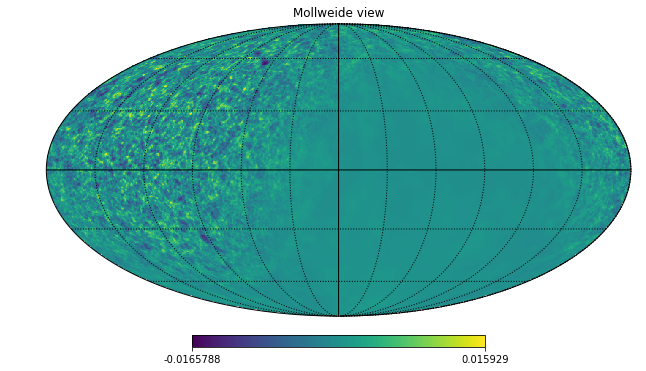

In [11]:
hp.mollview(data)
hp.graticule()
plt.show()

In [ ]:
build_maps_time_delay(1.,bsize=4000.,ngrid=256,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=False)

In [4]:
test='/Volumes/My Passport/cosmology/sdss3/borg_DMsheet/dmsheet_density_6200.npy'
d=np.load(test)

In [2]:

fnames=['/Volumes/My Passport/cosmology/sdss3/borg_DMsheet/dmsheet_density_6200.npy']


build_maps_lensing_resim(bsize=4000.,ngrid=512,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=False)


preparing maps...
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_DMsheet/dmsheet_density_6200.npy
TEST R 1800.0
preparing maps done...


In [4]:
mean= np.sum(d)/np.shape(d)[0]**3
delta=d/mean-1

plt.imshow(np.log(2+delta[:,:,256]),vmin=0,vmax=1)

NameError: name 'd' is not defined

In [7]:
np.shape(d)

(512, 512, 512)